In [36]:
from torch import nn
import torch
import numpy as np
import matplotlib.pyplot as plt
from torch import nn,optim
from torch.utils.data import Dataset, DataLoader
from torch import nn

torch.manual_seed(1)

In [37]:
class Data(Dataset):
    def __init__(self, train = True):
        if train == True:
            self.x = torch.arange(-3, 3, 0.1).view(-1,1)
            self.f = -3 * self.x + 1
            self.y = self.f + 0.1 * torch.randn(self.x.size())
            self.len = self.x.shape[0]

    def __getitem__(self, index):
        return self.x[index], self.y[index]

    def __len__(self):
        return self.len

In [38]:
trainData = Data()

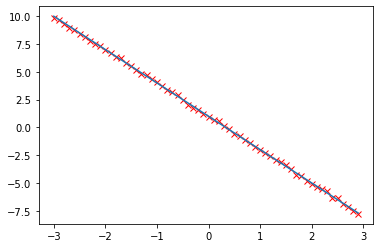

In [39]:
plt.plot(trainData.x.numpy(), trainData.y.numpy(), 'xr')
plt.plot(trainData.x.numpy(), trainData.f.numpy())
plt.show()

In [40]:
class linearRegression(nn.Module):
    def __init__(self, inputSize, outputSize):
        super(linearRegression,self).__init__()
        self.linear = nn.Linear(inputSize, outputSize)

    def forward(self, x):
        yhat = self.linear(x)
        return yhat

In [41]:
model = linearRegression(1,1)

In [42]:
optimizer = optim.SGD(model.parameters(), lr = 0.01)
criterion = nn.MSELoss()
trainloader = DataLoader(dataset=trainData, batch_size=1)

In [43]:
checkpointPath='checkpoint_model.pt'

In [44]:
checkpoint={'epoch':None, 'model_state_dict':None, 'optimizer_state_dict':None ,'loss': None}

In [45]:
epochs = 3
lossTrain = []
for epoch in range(epochs):
    for x, y in trainloader:
        yhat = model(x)
        loss = criterion(yhat, y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        loss_train = criterion(model(trainData.x), trainData.y).item()
        lossTrain.append(loss_train)

    checkpoint['epoch']=epoch
    checkpoint['model_state_dict']=model.state_dict()
    checkpoint['optimizer_state_dict']= optimizer.state_dict()
    checkpoint['loss']=loss
    torch.save(checkpoint, checkpointPath)

In [46]:
checkpoint = torch.load(checkpointPath)

In [47]:
checkpoint

{'epoch': 2,
 'model_state_dict': OrderedDict([('linear.weight', tensor([[-3.0082]])),
              ('linear.bias', tensor([0.9901]))]),
 'optimizer_state_dict': {'state': {0: {'momentum_buffer': None},
   1: {'momentum_buffer': None}},
  'param_groups': [{'lr': 0.01,
    'momentum': 0,
    'dampening': 0,
    'weight_decay': 0,
    'nesterov': False,
    'maximize': False,
    'params': [0, 1]}]},
 'loss': tensor(0.0037, requires_grad=True)}

In [48]:
modelCheckpoint = linearRegression(1,1)
modelCheckpoint.state_dict()

OrderedDict([('linear.weight', tensor([[0.5873]])),
             ('linear.bias', tensor([-0.5791]))])

In [49]:
modelCheckpoint.load_state_dict(checkpoint['model_state_dict'])
modelCheckpoint.state_dict()

OrderedDict([('linear.weight', tensor([[-3.0082]])),
             ('linear.bias', tensor([0.9901]))])

In [50]:
optimizer = optim.SGD(modelCheckpoint.parameters(), lr = 1)
optimizer.state_dict()

{'state': {},
 'param_groups': [{'lr': 1,
   'momentum': 0,
   'dampening': 0,
   'weight_decay': 0,
   'nesterov': False,
   'maximize': False,
   'params': [0, 1]}]}

In [51]:
optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
optimizer.state_dict()

{'state': {0: {'momentum_buffer': None}, 1: {'momentum_buffer': None}},
 'param_groups': [{'lr': 0.01,
   'momentum': 0,
   'dampening': 0,
   'weight_decay': 0,
   'nesterov': False,
   'maximize': False,
   'params': [0, 1]}]}

In [52]:
loss = checkpoint['loss']
print(loss)

tensor(0.0037, requires_grad=True)


In [53]:
for epoch in range(checkpoint['epoch'], epochs):
    for x, y in trainloader:
        yhat = modelCheckpoint(x)
        loss = criterion(yhat, y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        loss_train = criterion(modelCheckpoint(trainData.x), trainData.y).item()

        lossTrain.append(loss_train)

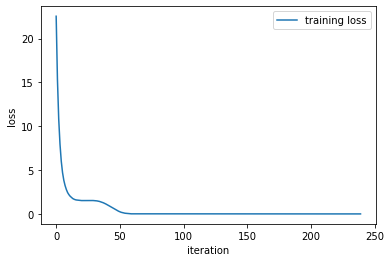

In [54]:
plt.plot(lossTrain, label = 'training loss')
plt.xlabel('iteration')
plt.ylabel('loss')
plt.legend(loc = 'upper right')
plt.show()